In [33]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
%matplotlib inline


In [2]:
Leirubakki_poles = pd.read_csv('../data/Poles/Leirubakki_poles_w_PlateID.csv')
Leirubakki_poles.head()

,Unnamed: 0,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,f,INCf,PLATf,PLONf,DPf,DMf,A95f,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID
0,0,Laurentia-Wyoming,Stillwater Complex - C2,new,NaN,NaN,NaN,45.2,249.200000,NaN,74.0,171.0,-63.0,63.0,32.0,2.9,-83.6,335.8,3.583959,4.559272,4.042307,1.0,-63.0,-83.6,335.8,3.6,4.6,4.069398,100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,A,2705.0,2701.0,2709.0,"2705±4, new",Stillwater Complex - C2,"Selkin, P.A., Gee, J.S., Meurer, W.P., Hemming...",2008.0,G-cubed,9,23pp,Paleointensity record from the 2.7 Ga Stillwat...,Corresponds to Cenozoic/Present Local Field,\cite{Selkin2008a},NaN,NaN,10049
1,1,Laurentia-Superior(East),Otto Stock dikes and aureole,2629,N+R Component,"C*+,R-",0.0,48.0,279.900002,18.0,84.0,330.0,71.0,71.0,139.0,3.0,69.0,227.0,4.500000,5.200000,4.837355,1.0,71.0,69.0,227.0,4.5,5.2,4.837355,17or83,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,B,2676.0,2671.0,2681.0,"2680±1 for stock, but lamprophyre dykes are yo...",Otto Stock Dykes and Aureole,"Pullaiah,G., Irving,E.",1975.0,Canad.J.Earth Sci.,12,1609-1618,Paleomagnetism of the contact aureole and late...,Overlaps with Cenozoic,\cite{Pullaiah1975b},NaN,NaN,10043
2,2,Laurentia-Slave,Defeat Suite,new,NaN,C*+,0.0,62.5,245.500000,5.0,58.0,2.0,-47.0,47.0,30.0,14.0,-1.0,64.0,15.000000,15.000000,15.000000,1.0,-47.0,-1.0,64.0,15.0,15.0,15.000000,0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,B,2625.0,2620.0,2630.0,"2625, U-Pb: 2628 pm 3, 2624 pm4",Defeat Suite,"Mitchell, R.N., Bleeker, W., Van Breemen, O., ...",2014.0,Am. J. Sci.,314,878-894,Plate tectonics before 2.0 Ga: Evidence from p...,NaN,\cite{Mitchell2014a},\cite{Davis1999a},NaN,10041
3,3,Laurentia-Superior(East),Ptarmigan-Mistassini dikes,new,NaN,NaN,0.0,54.0,287.000000,3.0,18.0,49.6,46.1,46.1,0.1,1000.0,-45.3,213.0,13.800000,13.800000,13.800000,1.0,46.1,-45.3,213.0,13.8,13.8,13.800000,0or100,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,B,2505.0,2503.0,2507.0,"2505±2,",PTARMIGAN MEAN,"Evans,D.A.D., Halls,H.C.",2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
4,4,Laurentia-Superior(East),Matachewan dikes R,new,NaN,C+,0.0,48.0,278.000000,NaN,1000.0,207.6,-16.6,16.6,1000.0,0.1,-44.1,238.3,1.600000,1.600000,1.600000,1.0,-16.6,-44.1,238.3,1.6,1.6,1.600000,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,A,2466.0,2443.0,2489.0,"two ages, both U-Pb(z)",MATACHEWAN R,"Evans,D.A.D., Halls,H.C.",2010.0,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043


In [3]:
Greenland_Euler = [67.5,-118.5,-13.8] #[lat,lon,CCW angle]

In [4]:
Leirubakki_poles['Laurentia_plon'] = pd.Series()
Leirubakki_poles['Laurentia_plat'] = pd.Series()

for pole in Leirubakki_poles.index:
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland':
        plat, plon = pmag.pt_rot(Greenland_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland-Nain':
        plat, plon = pmag.pt_rot(Greenland_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia':
        Leirubakki_poles['Laurentia_plat'][pole] = Leirubakki_poles['PLAT'][pole]
        Leirubakki_poles['Laurentia_plon'][pole] = Leirubakki_poles['PLONG'][pole]

In [121]:
Leirubakki_poles = Leirubakki_poles.dropna(subset=['Laurentia_plon'])
Leirubakki_poles.head()

,Unnamed: 0,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,f,INCf,PLATf,PLONf,DPf,DMf,A95f,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID,Laurentia_plon,Laurentia_plat
18,18,Laurentia-Greenland-Nain,Kangamiut dikes,3222,NaN,NaN,0.0,66.000000,307.000000,23.0,157.0,220.0,56.000000,56.000000,190.0,2.1,17.1,273.799988,2.2,3.2,2.6533,1.0,56.000000,17.1,273.799988,2.2,3.2,2.6533,0or100,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,B,2042.0,2030.0,2054.0,"2543, 2766, mixed polarity?",Kangamiut Dykes,"Fahrig, W.F., Bridgwater, D.",1976.0,Early Hist. of Earth,NaN,427-439,Late Archean-Early Proterozoic paleomagnetic p...,Looks like Victoria Fjord and Tobacco Root,\cite{Fahrig1976b},NaN,NaN,10032,262.386582,14.739309
35,35,Laurentia,Dubawnt Group,2737,NaN,"C+,Rc",100.0,64.099998,265.599998,30.0,130.0,347.0,-50.000000,50.000000,17.0,7.0,7.0,277.000000,8.0,8.0,8.0000,0.6,-63.300000,-19.4,95.300000,8.7,11.0,9.8000,63,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,B,1785.0,1750.0,1820.0,possibly ca.1750 ovp (Th.Raub 08 PhD thesis); ...,Dubawnt Group,"Park,J.K., Irving,E., Donaldson,J.A.",1973.0,Geol.Soc.Amer.Bull.,84,859-870,Paleomagnetism of the Dubawnt Group,Overlaps with a Devonian pole,\cite{Park1973a},NaN,NaN,1000,277.0,7.0
36,36,Laurentia,East Central Minnesota Batholith,NaN,NaN,NaN,0.0,45.500000,265.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.4,265.800000,NaN,NaN,4.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR,1779.0,1781.0,1777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\cite{Swanson-Hysell2021b},NaN,NaN,1000,265.8,20.4
39,39,Laurentia,Cleaver dikes,9139,NaN,"C+, C*+",0.0,67.500000,241.970001,17.0,102.0,136.5,57.400002,57.400002,64.0,4.5,19.4,276.700012,6.1,6.1,6.1000,1.0,57.400002,19.4,276.700012,6.1,6.1,6.1000,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,A,1740.5,1736.0,1745.0,"ok, GPMDB4.6",Cleaver Dykes,"Irving,E., Baker,J., M. Hamilton,M., Wynne,P.J.",2004.0,Precambrian Res.,129,251-270,Early Proterozoic geomagnetic field in western...,NaN,\cite{Irving2004a},NaN,NaN,1000,276.700012,19.4
40,40,Laurentia-Greenland,Melville Bugt diabase dikes,100377,NaN,NaN,0.0,74.583400,302.974000,9.0,54.0,33.1,-31.200000,31.200000,29.0,0.1,5.0,273.800000,8.7,8.7,8.7000,1.0,-31.200000,5.0,273.800000,8.7,8.7,8.7000,44or56,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,6.0,B,1633.0,1628.0,1638.0,U-Pb badd (1635 +/- 2.7; 1632 +/- 1.1; 1629.4 ...,Melville Bugt diabase,"Halls, Hamilton and Denyszyn",2011.0,Dyke Swarms: Keys for Geodynamic Interpretation,NaN,NaN,NaN,NaN,\cite{Halls2011a},NaN,update to correct reference,10032,261.359472,2.681808


In [122]:
plons = Leirubakki_poles['Laurentia_plon'].tolist()
plats = Leirubakki_poles['Laurentia_plat'].tolist()
A95s = Leirubakki_poles['A95'].tolist()
ages = Leirubakki_poles['nominal age'].tolist()

JK_lon = -87.655
JK_lat = 46.486

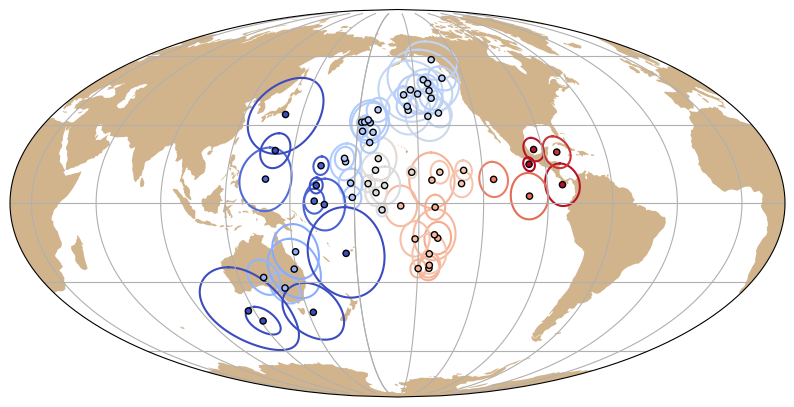

In [123]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10),land_edge_color='none')

ipmag.plot_poles_colorbar(map_axis,plons,plats,
                          A95s,
                          ages,700,1800,marker='o',colorbar=False,colormap='coolwarm')


In [124]:
decs = []
incs = []

for n in range(len(plons)):
    direction = pmag.vgp_di(plats[n],plons[n],JK_lat,JK_lon)
    decs.append(direction[0])
    incs.append(direction[1])


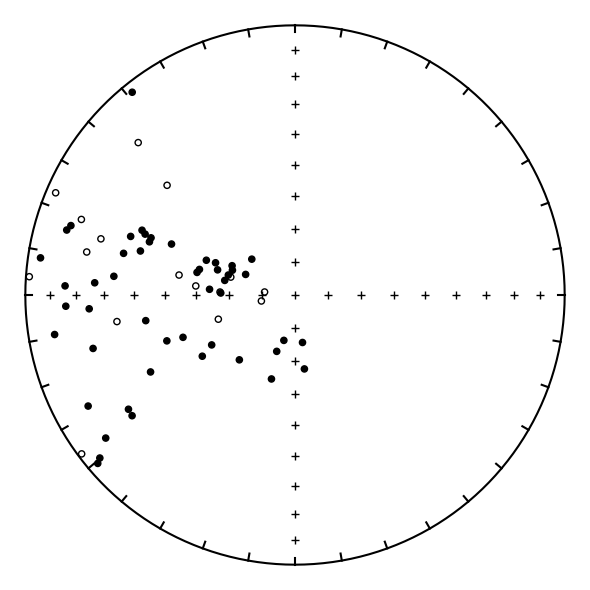

In [125]:
fignum=1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di(dec=decs,inc=incs)

In [182]:
data = {'Dec': decs, 'Inc': incs, 'Age': ages}
df = pd.DataFrame(data)

directions_1800_1600 = df[(df['Age'] >= 1600) & (df['Age'] <= 1800)]
directions_1600_1400 = df[(df['Age'] >= 1400) & (df['Age'] <= 1600)]
directions_1400_1200 = df[(df['Age'] >= 1200) & (df['Age'] <= 1400)]
directions_1200_1000 = df[(df['Age'] >= 1000) & (df['Age'] <= 1200)]
directions_800_600 = df[(df['Age'] >= 600) & (df['Age'] <= 800)]
Mesoproterozoic_directions = df[(df['Age'] >= 1000) & (df['Age'] <= 1600)]
Neoproterozoic_directions = df[(df['Age'] >= 540) & (df['Age'] <= 1000)]

#### Need to flip polarities to have unified reverse polarities for all age bins

In [211]:
dec_800_600_rev, inc_800_600_rev = ipmag.do_flip(dec=directions_800_600['Dec'].tolist(),
                                                 inc=directions_800_600['Inc'].tolist())
dec_1200_1000_rev, inc_1200_1000_rev = ipmag.do_flip(dec=directions_1200_1000['Dec'].tolist(),
                                                 inc=directions_1200_1000['Inc'].tolist())
dec_1400_1200_rev, inc_1400_1200_rev = ipmag.do_flip(dec=directions_1400_1200['Dec'].tolist(),
                                                 inc=directions_1400_1200['Inc'].tolist())

dec_1600_1400_rev, inc_1600_1400_rev = ipmag.do_flip(dec=directions_1600_1400['Dec'].tolist(),
                                                 inc=directions_1600_1400['Inc'].tolist())
dec_1800_1600_rev, inc_1800_1600_rev = ipmag.do_flip(dec=directions_1800_1600['Dec'].tolist(),
                                                 inc=directions_1800_1600['Inc'].tolist())


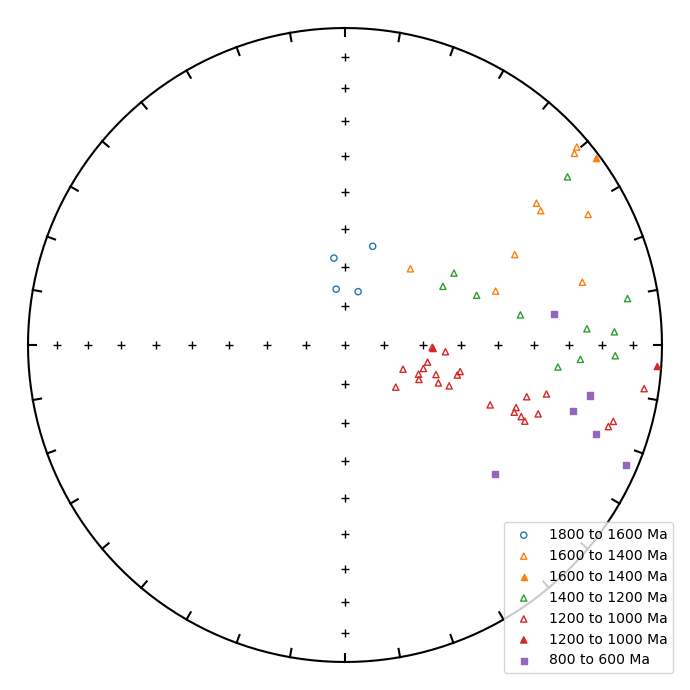

In [212]:
fignum=1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(fignum)
ipmag.plot_di(dec=dec_1800_1600_rev,
              inc=inc_1800_1600_rev,color='C0',marker='o',
              label='1800 to 1600 Ma')
ipmag.plot_di(dec=dec_1600_1400_rev,
              inc=inc_1600_1400_rev,color='C1',marker='^',
              label='1600 to 1400 Ma')
ipmag.plot_di(dec=dec_1400_1200_rev,
              inc=inc_1400_1200_rev ,color='C2',marker='^',
              label='1400 to 1200 Ma')
ipmag.plot_di(dec=dec_1200_1000_rev,
              inc=inc_1200_1000_rev,color='C3',marker='^',
              label='1200 to 1000 Ma')
#ipmag.plot_di(dec=directions_800_600['Dec'].tolist(),
              #inc=directions_800_600['Inc'].tolist(),color='C4',marker='s',
               #label='800 to 600 Ma')
ipmag.plot_di(dec=dec_800_600_rev,
               inc=inc_800_600_rev,color='C4',marker='s',
              label='800 to 600 Ma')
plt.legend(loc='lower right')

In [13]:
Laurentia_Phanerozoic_poles = pd.read_csv('../data/Poles/Laurentia_Pole_Compilation.csv')
Laurentia_Phanerozoic_poles = Laurentia_Phanerozoic_poles[Laurentia_Phanerozoic_poles['RLat'].isnull()]
Laurentia_Phanerozoic_poles

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference
10,6,8.0,NaN,Jeffreys Village Member,-27.0,311.0,-17.8,309.8,NaN,NaN,NaN,333,"1534, T"
11,7,9.0,I__,Deer Lake Formation,-18.6,304.2,-18.6,304.2,NaN,NaN,NaN,335,Bilardello and Kodama (2010b)
12,3,16.0,NaN,Catskill Formation South,-27.4,303.0,-16.6,299.6,NaN,NaN,NaN,370,1693
13,4,9.0,NaN,Andreas red beds,-13.0,285.0,1.5,284.8,NaN,NaN,NaN,415,"1388, T96"
14,7,5.3,NaN,Wabash Reef,-17.0,305.0,-17.0,305.0,NaN,NaN,NaN,420,"1277, T96"
15,6,5.8,NaN,Rose Hill Formation,-19.1,308.3,-19.1,308.3,NaN,NaN,NaN,425,1218
16,4,7.3,NaN,Ringgold Gap sediments,-24.0,326.6,-16.9,321.7,NaN,NaN,NaN,438,1689
17,4,3.9,NaN,Tablehead Group limestone Mean,-13.4,329.3,-13.4,329.3,NaN,NaN,NaN,470,"2257, 1931, T96 (recalculated)"
18,4,4.3,NaN,St. George Group limestone,-17.5,332.4,-17.5,332.4,NaN,NaN,NaN,480,"1928, T96"
19,6,11.9,NaN,Oneota Dolomite,-10.3,346.5,-10.3,346.5,NaN,NaN,NaN,490,"1283, T96"


In [246]:
Laurentia_Cambrian_poles = Laurentia_Phanerozoic_poles[Laurentia_Phanerozoic_poles['Age'] > 485]

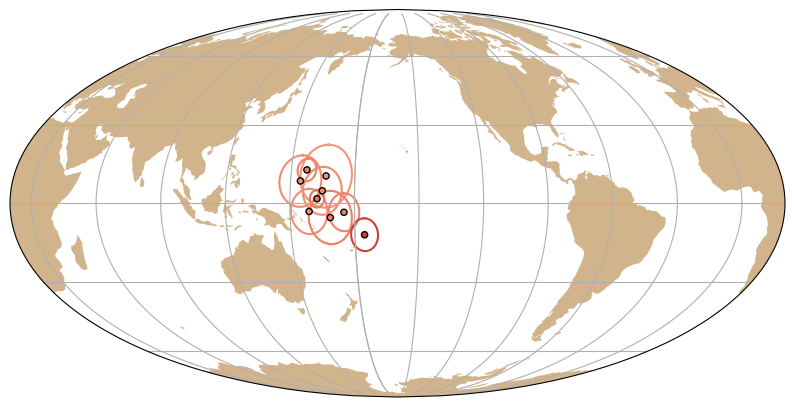

In [247]:
plons = Laurentia_Cambrian_poles['CLon'].tolist()
plats = Laurentia_Cambrian_poles['CLat'].tolist()
A95s = Laurentia_Cambrian_poles['A95'].tolist()
ages = Laurentia_Cambrian_poles['Age'].tolist()

map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10),land_edge_color='none')

plons_rev, plats_rev = ipmag.do_flip(plons,plats)

ipmag.plot_poles_colorbar(map_axis,plons_rev,plats_rev,
                          A95s,
                          ages,300,550,marker='o',colorbar=False,colormap='coolwarm')

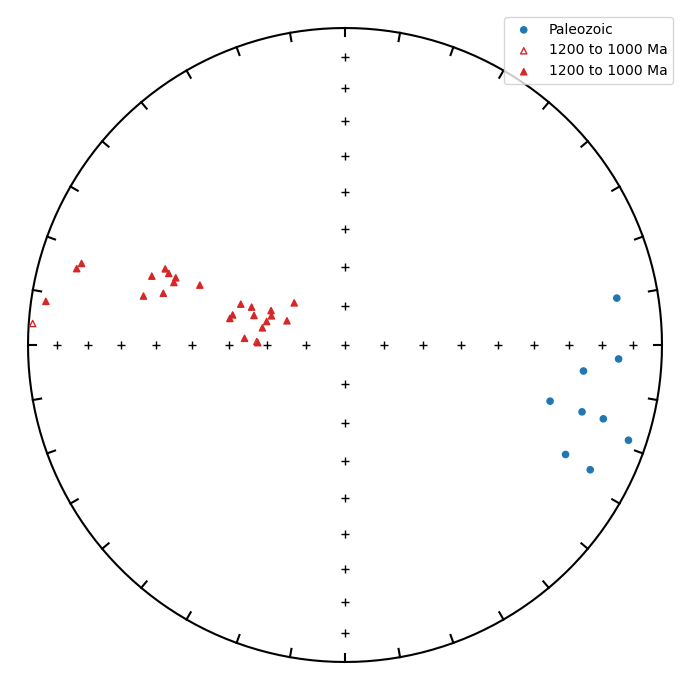

In [248]:
decs = []
incs = []

for n in range(len(plons)):
    direction = pmag.vgp_di(plats[n],plons[n],JK_lat,JK_lon)
    decs.append(direction[0])
    incs.append(direction[1])
    
data = {'Dec': decs, 'Inc': incs, 'Age': ages}
Paleozoic_directions = pd.DataFrame(data)

fignum=1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(fignum)
ipmag.plot_di(dec=Paleozoic_directions['Dec'].tolist(),
              inc=Paleozoic_directions['Inc'].tolist(),color='C0',marker='o',
              label='Paleozoic')
ipmag.plot_di(dec=directions_1200_1000['Dec'].tolist(),
              inc=directions_1200_1000['Inc'].tolist(),color='C3',marker='^',
              label='1200 to 1000 Ma')
plt.legend()

### Incorporate Negaunee and Goodrich directions to the plots 

#### Add JK23, NF, and GQ5 data to the expected directions

In [237]:
jk_23_specimen=pd.read_csv('../data/MagIC_Format/jk/specimens.txt',delimiter='\t',header=1)
jk_23_specimen['lon']=-87.6546
jk_23_specimen['lat']=46.4867

jk_23_specimen=ipmag.vgp_calc(jk_23_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')
jk23_mgt_tilt=jk_23_specimen[(jk_23_specimen['dir_comp']=='Mgt')&(jk_23_specimen['dir_tilt_correction']==100)]
jk23_mgt_geo=jk_23_specimen[(jk_23_specimen['dir_comp']=='Mgt')&(jk_23_specimen['dir_tilt_correction']==0)]
jk23_hmt_tilt=jk_23_specimen[(jk_23_specimen['dir_comp']=='Hmt')&(jk_23_specimen['dir_tilt_correction']==100)]
jk23_hmt_geo=jk_23_specimen[(jk_23_specimen['dir_comp']=='Hmt')&(jk_23_specimen['dir_tilt_correction']==0)]



In [238]:
NF_specimen=pd.read_csv('../data/MagIC_Format/NF/specimens.txt',delimiter='\t',header=1)

NF_specimen['lon']=-87.6546
NF_specimen['lat']=46.4867

NF_specimen=ipmag.vgp_calc(NF_specimen,tilt_correction='no',
                           site_lon='lon',
                           site_lat='lat',
                           dec_is='dir_dec',
                           inc_is='dir_inc')
NF_mgt_tilt=NF_specimen[(NF_specimen['dir_comp']=='Mgt')&(NF_specimen['dir_tilt_correction']==100)]
NF_mgt_geo=NF_specimen[(NF_specimen['dir_comp']=='Mgt')&(NF_specimen['dir_tilt_correction']==0)]
NF_hmt_tilt=NF_specimen[(NF_specimen['dir_comp']=='Hmt')&(NF_specimen['dir_tilt_correction']==100)]
NF_hmt_geo=NF_specimen[(NF_specimen['dir_comp']=='Hmt')&(NF_specimen['dir_tilt_correction']==0)]

In [239]:
jk_samples=pd.read_csv('../data/MagIC_Format/jk/samples.txt',delimiter='\t',header=1)
NF_samples=pd.read_csv('../data/MagIC_Format/NF/samples.txt',delimiter='\t',header=1)

IF_samples=pd.concat([jk_samples,NF_samples],ignore_index=True)
IF_bedding=IF_samples[['sample','bed_dip_direction','bed_dip']]

IF_hmt_geo=pd.concat([jk23_hmt_geo,NF_hmt_geo],ignore_index=True)
IF_mgt_geo=pd.concat([jk23_mgt_geo,NF_mgt_geo],ignore_index=True)
IF_hmt_tilt=pd.concat([jk23_hmt_tilt,NF_hmt_tilt],ignore_index=True)
IF_mgt_tilt=pd.concat([jk23_mgt_tilt,NF_mgt_tilt],ignore_index=True)

IF_hmt_geo=pd.merge(IF_hmt_geo,IF_bedding,on='sample')
IF_mgt_geo=pd.merge(IF_mgt_geo,IF_bedding,on='sample')

In [240]:
young_specimens=['jk.22a','jk.23a','jk.24a','jk.25a','jk.26a','jk.27a','jk.28a','jk.29a','jk.31a','jk.35a','jk.36a',
                 'jk.37a']
young_jk=IF_hmt_geo[IF_hmt_geo['specimen'].isin(young_specimens)]

NF9=['NF.9-1','NF.9-2','NF.9-3','NF.9-4','NF.9-5','NF.9-6','NF.9-7']
NF9_dir=IF_hmt_geo[IF_hmt_geo['specimen'].isin(NF9)]

NF10=['NF.10-1','NF.10-2','NF.10-3','NF.10-4']
NF10_dir=IF_hmt_geo[IF_hmt_geo['specimen'].isin(NF10)]
top_IF=jk23_hmt_geo[~jk23_hmt_geo['specimen'].isin(young_specimens)]
top_IF_tilt=jk23_hmt_tilt[~jk23_hmt_tilt['specimen'].isin(young_specimens)]
jk_top=IF_hmt_geo[IF_hmt_geo['sample'].isin(top_IF['sample'])]

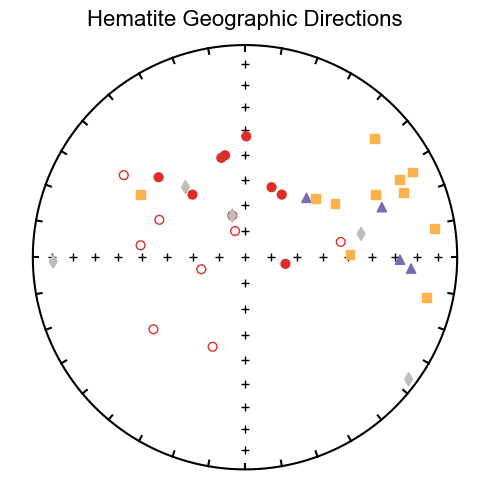

In [242]:
hmt_color='#de2d26'
mgt_color='#43a2ca'


new_rich=NF9+NF10
nf_geo=IF_hmt_geo[IF_hmt_geo['specimen'].isin(new_rich)]
nf_tc=IF_hmt_tilt[IF_hmt_tilt['specimen'].isin(new_rich)]

jk_side_specimens=['jk.22a','jk.23a','jk.24a','jk.25a']
jk_side_geo=IF_hmt_geo[IF_hmt_geo['specimen'].isin(jk_side_specimens)]
jk_top_tilt=IF_hmt_tilt[IF_hmt_tilt['sample'].isin(top_IF['sample'])]
jk_side_tilt=IF_hmt_tilt[IF_hmt_tilt['specimen'].isin(jk_side_specimens)]

jk_south_specimens=['jk.26a','jk.27a','jk.28a','jk.29a','jk.30a','jk.31a','jk.35a']
jk_south_geo=IF_hmt_geo[IF_hmt_geo['specimen'].isin(jk_south_specimens)]
jk_south_tilt=IF_hmt_tilt[IF_hmt_tilt['specimen'].isin(jk_south_specimens)]


jk_top_clr=hmt_color
jk_side_clr='#756bb1'
jk_south_clr='#bdbdbd'
nf_color='#feb24c'

plt.figure(figsize=(5,5))

plt.subplot(1,1,1)
ipmag.plot_net()
plt.title('Hematite Geographic Directions',font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top['dir_dec'].tolist(), inc=jk_top['dir_inc'].tolist(),color=jk_top_clr,marker='o',markersize=40,label='JK summit')
ipmag.plot_di(dec=jk_side_geo['dir_dec'].tolist(), inc=jk_side_geo['dir_inc'].tolist(),color=jk_side_clr,marker='^',markersize=45,label='JK side')
ipmag.plot_di(dec=jk_south_geo['dir_dec'].tolist(), inc=jk_south_geo['dir_inc'].tolist(),color=jk_south_clr,marker='d',markersize=45,label='JK south')
ipmag.plot_di(dec=nf_geo['dir_dec'].tolist(), inc=nf_geo['dir_inc'].tolist(),color=nf_color,marker='s',markersize=40,label='New Richmond')


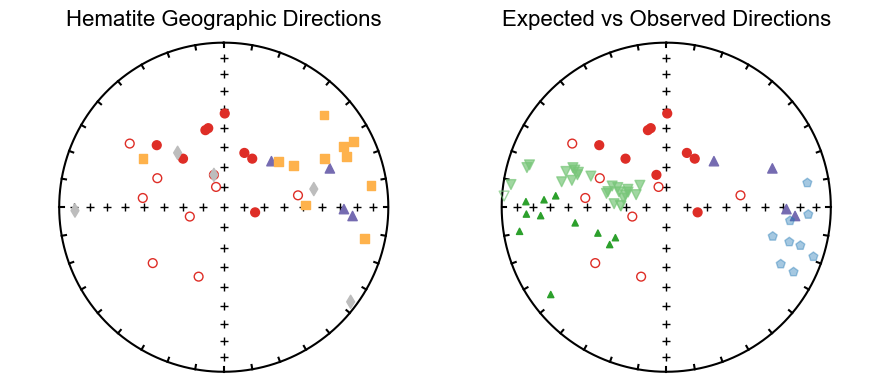

In [243]:

plt.figure(figsize=(9,4))


plt.subplot(1,2,1)
ipmag.plot_net()
plt.title('Hematite Geographic Directions',font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top['dir_dec'].tolist(), inc=jk_top['dir_inc'].tolist(),color=jk_top_clr,marker='o',markersize=40,label='JK summit')
ipmag.plot_di(dec=jk_side_geo['dir_dec'].tolist(), inc=jk_side_geo['dir_inc'].tolist(),color=jk_side_clr,marker='^',markersize=45,label='JK side')
ipmag.plot_di(dec=jk_south_geo['dir_dec'].tolist(), inc=jk_south_geo['dir_inc'].tolist(),color=jk_south_clr,marker='d',markersize=45,label='JK south')
ipmag.plot_di(dec=nf_geo['dir_dec'].tolist(), inc=nf_geo['dir_inc'].tolist(),color=nf_color,marker='s',markersize=40,label='New Richmond')



plt.subplot(1,2,2)
ipmag.plot_net()
plt.title('Expected vs Observed Directions',font='arial',fontsize=16)


ipmag.plot_di(dec=jk_side_geo['dir_dec'].tolist(), inc=jk_side_geo['dir_inc'].tolist(),color=jk_side_clr,marker='^',markersize=45,label='JK side')
ipmag.plot_di(dec=Paleozoic_directions['Dec'].tolist(),
              inc=Paleozoic_directions['Inc'].tolist(),color='C0',marker='p',alpha=0.4,markersize=45,
              label='Paleozoic')
ipmag.plot_di(dec=directions_1200_1000['Dec'].tolist(),
              inc=directions_1200_1000['Inc'].tolist(),color='#78c679',marker='v',alpha=0.7,markersize=50,
              label='1200 to 1000 Ma')
ipmag.plot_di(dec=directions_1400_1200['Dec'].tolist(),
              inc=directions_1400_1200['Inc'].tolist(),color='C2',marker='^',
              label='1400 to 1200 Ma')
ipmag.plot_di(dec=jk_top['dir_dec'].tolist(), inc=jk_top['dir_inc'].tolist(),color=jk_top_clr,marker='o',markersize=40,label='JK summit')



#ipmag.plot_di(dec=directions_800_600['Dec'].tolist(),
              #inc=directions_800_600['Inc'].tolist(),color='C4',marker='s',
              #label='800 to 600 Ma')
#ipmag.plot_di(dec=dec_800_600_rev,
               #inc=inc_800_600_rev,color='C4',marker='s',
              #label='800 to 600 Ma')


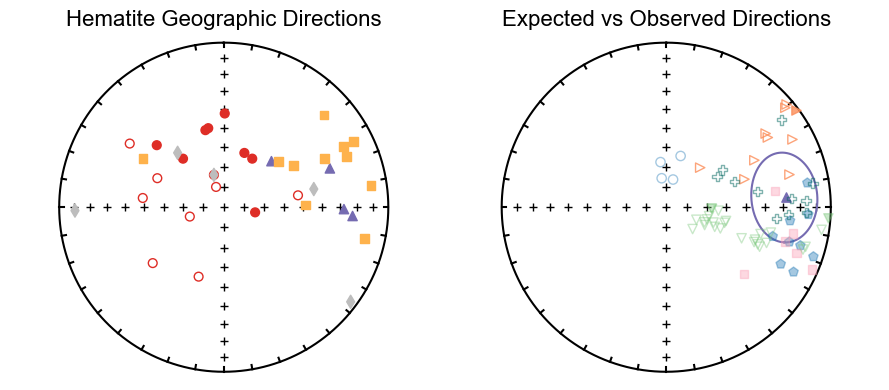

In [245]:
jk_side_shallow=IF_hmt_geo[IF_hmt_geo['specimen'].isin(['jk.22a','jk.23a','jk.25a'])]
jk_top_mean=ipmag.fisher_mean(dec=jk_top['dir_dec'].tolist(),inc=jk_top['dir_inc'].tolist())
jk_side_mean=ipmag.fisher_mean(dec=jk_side_shallow['dir_dec'].tolist(),inc=jk_side_shallow['dir_inc'].tolist())


plt.figure(figsize=(9,4))


plt.subplot(1,2,1)
ipmag.plot_net()
plt.title('Hematite Geographic Directions',font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top['dir_dec'].tolist(), inc=jk_top['dir_inc'].tolist(),color=jk_top_clr,marker='o',markersize=40,label='JK summit')
ipmag.plot_di(dec=jk_side_geo['dir_dec'].tolist(), inc=jk_side_geo['dir_inc'].tolist(),color=jk_side_clr,marker='^',markersize=45,label='JK side')
ipmag.plot_di(dec=jk_south_geo['dir_dec'].tolist(), inc=jk_south_geo['dir_inc'].tolist(),color=jk_south_clr,marker='d',markersize=45,label='JK south')
ipmag.plot_di(dec=nf_geo['dir_dec'].tolist(), inc=nf_geo['dir_inc'].tolist(),color=nf_color,marker='s',markersize=40,label='New Richmond')



plt.subplot(1,2,2)
ipmag.plot_net()
plt.title('Expected vs Observed Directions',font='arial',fontsize=16)


ipmag.plot_di_mean(dec=jk_side_mean['dec'], inc=jk_side_mean['inc'],a95=jk_side_mean['alpha95'],color=jk_side_clr,marker='^',markersize=45,label='JK side')
#ipmag.plot_di_mean(dec=jk_top_mean['dec'], inc=jk_top_mean['inc'],a95=jk_top_mean['alpha95'],color=jk_top_clr,marker='^',markersize=45,label='JK top')

ipmag.plot_di(dec=Paleozoic_directions['Dec'].tolist(),
              inc=Paleozoic_directions['Inc'].tolist(),color='C0',marker='p',alpha=0.4,markersize=50,
              label='Paleozoic')
ipmag.plot_di(dec=dec_800_600_rev,
               inc=inc_800_600_rev,color='#fa9fb5',marker='s',alpha=0.4,markersize=35,
              label='800 to 600 Ma')

ipmag.plot_di(dec=dec_1200_1000_rev,
              inc=inc_1200_1000_rev,color='#78c679',marker='v',alpha=0.4,markersize=45,
              label='1200 to 1000 Ma')
ipmag.plot_di(dec=dec_1800_1600_rev,
              inc=inc_1800_1600_rev,color='C0',marker='o',alpha=0.4,markersize=45,
              label='1800 to 1600 Ma')
ipmag.plot_di(dec=dec_1600_1400_rev,
              inc=inc_1600_1400_rev,color='#fc8d59',marker='>',alpha=0.8,markersize=45,
              label='1600 to 1400 Ma')
ipmag.plot_di(dec=dec_1400_1200_rev,
              inc=inc_1400_1200_rev ,color='#01665e',marker='P',alpha=0.5,markersize=45,
              label='1400 to 1200 Ma')

plt.savefig('../figures/eq_area/pmag_comparison.pdf',dpi=300,bbox_inches='tight')




In [249]:
print(jk_side_mean)

{'dec': 85.2763704470832, 'inc': 27.836690877237046, 'n': 3, 'r': 2.953445569994319, 'k': 42.960465840865176, 'alpha95': 19.04377107900525, 'csd': 12.358066500615537}


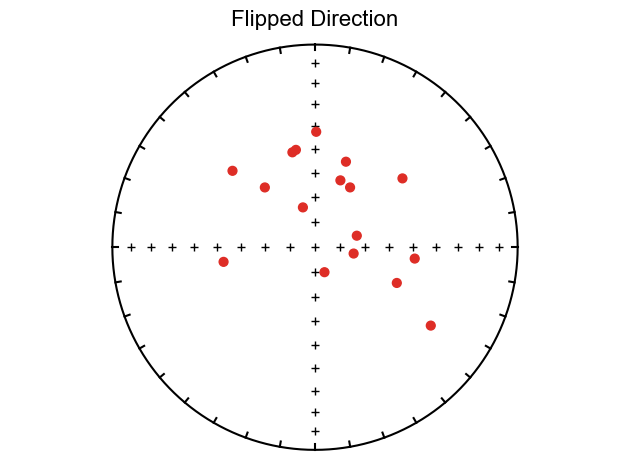

In [97]:

dec_rev, inc_rev=ipmag.do_flip(dec=jk_top_rev['dir_dec'].tolist(),inc=jk_top_rev['dir_inc'].tolist())


ipmag.plot_net()
plt.title('Flipped Direction',font='arial',fontsize=16)
ipmag.plot_di(dec=jk_top_normal['dir_dec'].tolist(), inc=jk_top_normal['dir_inc'].tolist(),color=jk_top_clr,marker='o',markersize=40,label='JK summit')

ipmag.plot_di(dec=dec_rev, inc=inc_rev,color=jk_top_clr,marker='o',markersize=40,label='JK summit')


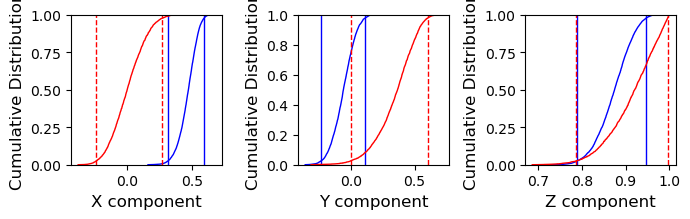

Fail, distinct in x


0

In [112]:
ipmag.reversal_test_bootstrap(dec=jk_top['dir_dec'].tolist(),inc=jk_top['dir_inc'].tolist())

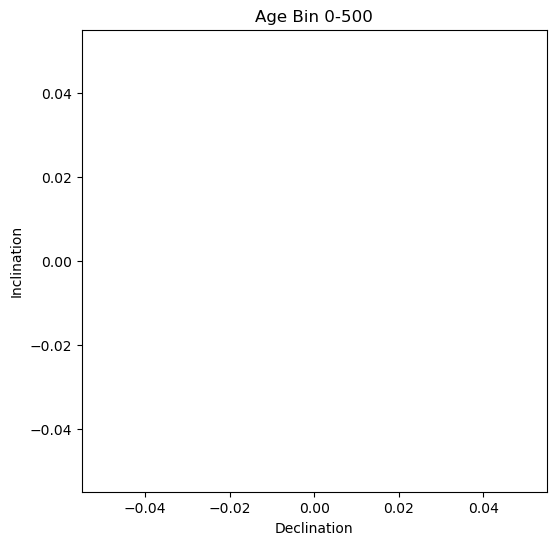

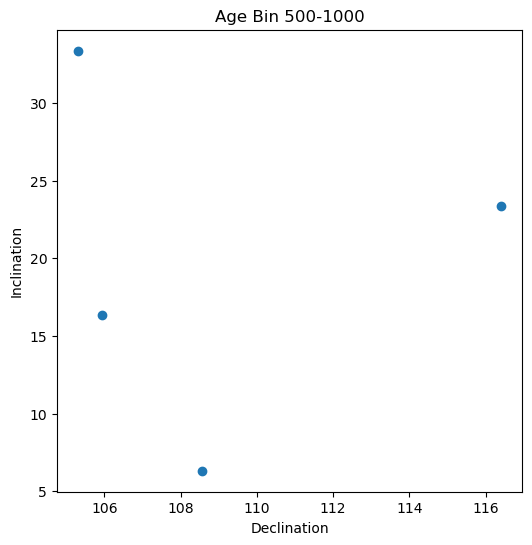

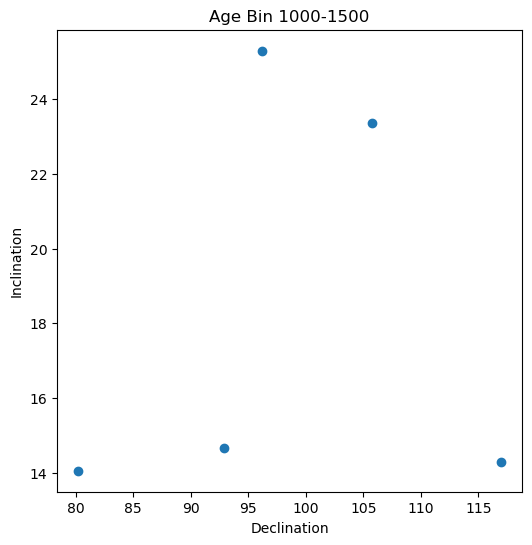

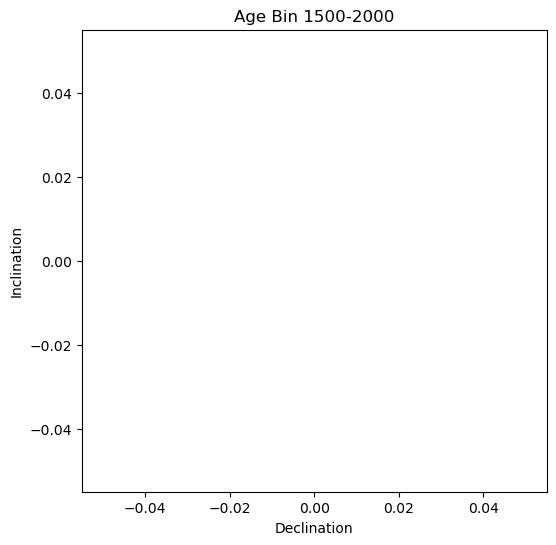

IndexError: list index out of range

<Figure size 600x600 with 0 Axes>

In [17]:
import numpy as np
# Define the age bins
age_bins = [0, 500, 1000, 1500, 2000]

# Use numpy.digitize() to assign each age to a bin
age_indices = np.digitize(ages, age_bins)

# Create empty lists to store filtered decs and incs
filtered_decs = [[] for _ in range(len(age_bins))]
filtered_incs = [[] for _ in range(len(age_bins))]

# Filter decs and incs into different age bins
for i in range(len(decs)):
    age_index = age_indices[i]
    filtered_decs[age_index].append(decs[i])
    filtered_incs[age_index].append(incs[i])

# Plot each age bin
for i in range(len(age_bins)):
    plt.figure(figsize=(6, 6))
    plt.title(f"Age Bin {age_bins[i]}-{age_bins[i+1]}")
    plt.xlabel("Declination")
    plt.ylabel("Inclination")
    plt.scatter(filtered_decs[i], filtered_incs[i])
    plt.show()


In [251]:
ipmag.lat_from_inc(28)

14.887975603633317